In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras 
from keras.models import  Sequential
from keras.layers import Dense
from keras.layers import Embedding
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
pd.options.plotting.backend = "plotly"

# Load data

In [3]:
df = pd.read_csv('~/Downloads/feeds-13.csv')
df = df.drop(columns=['field8', 'latitude', 'longitude', 'elevation', 'status'])
df = df.rename(columns={"field1":"CO2", "field2":"PM25", "field3":"PM10", "field4":"Temp", "field5":"Humidity", "field6":"Pressure", "field7":"Lux"})

In [4]:
df1 = pd.read_csv('~/Downloads/kerkrade4tillJune1.csv')
df1 = df1.rename(columns={"field1":"CO2", "field2":"PM25", "field3":"PM10", "field4":"Temp", "field5":"Humidity", "field6":"Pressure", "field7":"Lux"})

In [5]:
df.created_at

0         2021-05-15T12:43:28+02:00
1         2021-05-15T12:44:28+02:00
2         2021-05-15T12:45:28+02:00
3         2021-05-15T12:46:28+02:00
4         2021-05-15T12:47:28+02:00
                    ...            
169589    2021-09-24T07:24:35+02:00
169590    2021-09-24T07:25:35+02:00
169591    2021-09-24T07:26:35+02:00
169592    2021-09-24T07:27:35+02:00
169593    2021-09-24T07:28:35+02:00
Name: created_at, Length: 169594, dtype: object

In [6]:
" ".join(df1.created_at.iloc[0].split()[:-1])

'2020-08-24 23:36:49'

# Data Analytics

## Correlation Analysis

In [7]:
import seaborn as sns

<AxesSubplot:>

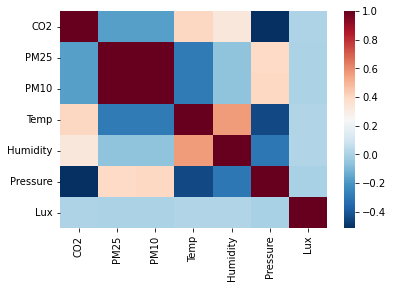

In [12]:
df_corr = df.drop(["created_at", "entry_id"], axis=1)
df_corr = df_corr.corr()
sns.heatmap(df_corr, cmap = "RdBu_r")

In [13]:
df_corr.loc["CO2"]

CO2         1.000000
PM25       -0.174118
PM10       -0.173935
Temp        0.403772
Humidity    0.330445
Pressure   -0.515853
Lux         0.007520
Name: CO2, dtype: float64

## Pre processing

In [14]:
timestart = pd.Timestamp(2021, 6, 1, 0)

timeend = pd.Timestamp(2021, 6, 1, 0)

In [15]:
df.created_at = df.created_at.apply(lambda row:row.split('+')[0])

df.created_at = df.created_at.apply(lambda row:pd.Timestamp(row))

In [16]:
df1.created_at = df1.created_at.apply(lambda row:" ".join(row.split()[:-1]))

df1.created_at = df1.created_at.apply(lambda row:pd.Timestamp(row))

In [17]:
df1.created_at

0        2020-08-24 23:36:49
1        2020-08-24 23:37:49
2        2020-08-24 23:38:48
3        2020-08-24 23:39:49
4        2020-08-24 23:40:49
                 ...        
341931   2021-06-01 10:55:38
341932   2021-06-01 10:56:38
341933   2021-06-01 10:57:38
341934   2021-06-01 10:58:38
341935   2021-06-01 10:59:38
Name: created_at, Length: 341936, dtype: datetime64[ns]

In [18]:
df = df[df.created_at > timestart]
df1 = df1[df1.created_at <= timeend]

### Create sub dataset from df1

In [19]:
dataframes = {}
times = [(pd.Timestamp(2020, 9, 21, 12, 31), pd.Timestamp(2020, 9, 24, 8, 53)),
        (pd.Timestamp(2020, 9, 24, 11, 43), pd.Timestamp(2020, 9, 25, 16, 19)),
        (pd.Timestamp(2020, 9, 30, 12, 30), pd.Timestamp(2020, 10, 1, 17, 42)),
        (pd.Timestamp(2020, 10, 1, 23, 52), pd.Timestamp(2020, 10, 3, 6, 42)), 
        (pd.Timestamp(2020, 10, 3, 18, 52), pd.Timestamp(2020, 10, 4, 6, 44)),
        (pd.Timestamp(2020, 10, 19, 22, 20), pd.Timestamp(2020, 10, 20, 4, 36)),
        (pd.Timestamp(2020, 10, 20, 4, 57), pd.Timestamp(2020, 10, 20, 7, 12)),
        (pd.Timestamp(2020, 10, 20, 21, 34), pd.Timestamp(2020, 10, 21, 15, 15)),
        (pd.Timestamp(2020, 10, 24, 17, 13), pd.Timestamp(2020, 10, 25, 8, 25)),
        (pd.Timestamp(2020, 10, 27, 16, 51), pd.Timestamp(2020, 10, 27, 21, 55)),
        (pd.Timestamp(2020, 11, 14, 22, 45), pd.Timestamp(2020, 11, 15, 19, 20)),
        (pd.Timestamp(2020, 11, 30, 13, 14), pd.Timestamp(2020, 12, 1, 6, 32)),
        (pd.Timestamp(2020, 12, 2, 12, 23), pd.Timestamp(2020, 12, 4, 9, 34)),
        (pd.Timestamp(2020, 12, 10, 23, 59), pd.Timestamp(2020, 12, 11, 21, 23)),
        (pd.Timestamp(2021, 1, 11, 23, 37), pd.Timestamp(2021, 1, 12, 10, 44)),
        (pd.Timestamp(2021, 1, 28, 3, 58), pd.Timestamp(2021, 1, 28, 14, 45)),
        (pd.Timestamp(2021, 1, 29, 1, 12), pd.Timestamp(2021, 1, 29, 8, 42)),
        (pd.Timestamp(2021, 1, 31, 14, 37), pd.Timestamp(2021, 2, 1, 7, 55)),
        (pd.Timestamp(2021, 2, 6, 13, 50), pd.Timestamp(2021, 2, 7, 9, 48)),
        (pd.Timestamp(2021, 2, 16, 5, 4), pd.Timestamp(2021, 2, 16, 19, 24)),
        (pd.Timestamp(2021, 2, 18, 5, 16), pd.Timestamp(2021, 2, 18, 19, 7)),
        (pd.Timestamp(2021, 3, 3, 14, 35), pd.Timestamp(2021, 3, 4, 16, 43)),
        (pd.Timestamp(2021, 3, 10, 11, 36), pd.Timestamp(2021, 3, 11, 10, 20)),
        (pd.Timestamp(2021, 3, 13, 1, 57), pd.Timestamp(2021, 3, 13, 8, 36)),
        (pd.Timestamp(2021, 3, 26, 13, 33), pd.Timestamp(2021, 3, 27, 1, 27)),
        (pd.Timestamp(2021, 4, 4, 14, 1), pd.Timestamp(2021, 4, 5, 12, 4)),
        (pd.Timestamp(2021, 4, 10, 14, 15), pd.Timestamp(2021, 4, 11, 4, 9)),
        (pd.Timestamp(2021, 4, 26, 9, 39), pd.Timestamp(2021, 4, 29, 5, 6)),
        (pd.Timestamp(2021, 5, 3, 16, 9), pd.Timestamp(2021, 5, 4, 12, 23)),
        (pd.Timestamp(2021, 5, 9, 0, 31), pd.Timestamp(2021, 5, 9, 20, 15)),
        (pd.Timestamp(2021, 5, 15, 11, 39), pd.Timestamp(2021, 5, 15, 20, 53)),
        (pd.Timestamp(2021, 5, 20, 19, 25), pd.Timestamp(2021, 5, 21, 11, 33)),
        (pd.Timestamp(2021, 5, 21, 13, 33), pd.Timestamp(2021, 5, 22, 1, 37))]

x_columns = ['PM25', 'PM10', 'Temp', 'Humidity', 'Pressure', 'Lux']
y_columns = ['CO2']
features = ['CO2', 'PM25', 'PM10', 'Temp', 'Humidity', 'Pressure', 'Lux']
for num,(start, end) in enumerate(times): 
    _df = df1.copy()
    _df = _df[_df.created_at > start]
    _df = _df[_df.created_at <= end]
    _df = _df.drop(['created_at'], axis=1)
    X,y = _df[x_columns].to_numpy(), _df[y_columns].to_numpy()
    dataframes[num]= (X,y)


df = df.drop(['created_at'], axis=1)
X,y = df[x_columns].to_numpy(), df[y_columns].to_numpy()
dataframes[len(times)]= (X,y)

In [20]:
x_combined = np.concatenate(([_df for num, (_df, _) in dataframes.items()]), axis=0)
y_combined = np.concatenate(([_df for num, (_, _df) in dataframes.items()]), axis=0)

x_combined_df = pd.DataFrame(data=x_combined, columns=x_columns)
y_combined_df = pd.DataFrame(data=y_combined, columns=y_columns)

newdf = pd.concat([y_combined_df, x_combined_df], axis=1) 
newdf.describe()

CO2           PM25           PM10           Temp  \
count  203648.000000  203648.000000  203648.000000  203648.000000   
mean     1422.423584       6.373090       4.401354      21.302511   
std      1117.967424       4.751434       3.410722       0.916792   
min       400.000000       1.000000       0.000000      18.590000   
25%       674.000000       3.000000       2.000000      20.720000   
50%       907.000000       5.000000       4.000000      21.580000   
75%      1827.000000       7.000000       5.000000      21.920000   
max      5000.000000      52.000000      34.000000      23.780000   

            Humidity       Pressure            Lux  
count  203648.000000  203648.000000  203648.000000  
mean       64.049778     995.883991      13.336387  
std         6.792109       7.539089       2.502564  
min        39.580000     962.070000       6.200000  
25%        61.730000     992.020000      12.510000  
50%        66.400000     996.900000      13.260000  
75%        69.160000    1000.980000      13.920000  
max        72.450000    1011.660000      42.160000

In [21]:
import plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [22]:
px.line(df1[:50000],  x='created_at', y='CO2')

### Split dataset into 70/15/15 train-test-val

In [25]:
_X, _y = dataframes[len(times)]
_X_train, X_test, _y_train, y_test = train_test_split(_X, _y, test_size = 0.15, shuffle = False)

### Normalize data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#define scaler z score normalization
scaler = StandardScaler()
_df = np.concatenate(([_X_train]+[dataframes[num][0] for num in range(len(times))]))
scaler.fit(_df)

StandardScaler()

In [28]:
transformed_dfs = {}
for num, _df in dataframes.items():
    _X,_y = _df
    _X_transformed = scaler.transform(_X)
    transformed_dfs[num]= (_X_transformed, _y)

X_test_transformed = scaler.transform(X_test)

### Window data

In [29]:
import numpy as np
window_size = 60
stride_size = 1

def window_array(array, window_size, stride_size=1):
    sub_windows = (
                np.expand_dims(np.arange(window_size), 0) +
                np.expand_dims(np.arange(array.shape[0] - window_size + 1 , step=stride_size), 0).T
            )
    return array[sub_windows]

In [30]:
windowed_dfs = {}
for num, _df in transformed_dfs.items():
    _X,_y = _df
    _X_windowed = window_array(_X, window_size)
    _y_windowed = window_array(_y, window_size)
    windowed_dfs[num]= (_X_windowed, _y_windowed)
    
X_test_windowed = window_array(X_test_transformed, window_size)
y_test_windowed =window_array(y_test, window_size)

In [31]:
X_train_windowed = np.concatenate(([windowed_dfs[num][0] for num in range(len(times)+1)]))
y_train_windowed = np.concatenate(([windowed_dfs[num][1] for num in range(len(times)+1)]))

In [32]:
X_train_windowed.shape, y_train_windowed.shape

((201642, 60, 6), (201642, 60, 1))

In [33]:
#shuffle only train  dataset
idxs = list(np.arange(len(X_train_windowed)))
import random 
shuffled_idxs = random.sample(idxs, len(X_train_windowed))
X_train_windowed, y_train_windowed = X_train_windowed[shuffled_idxs], y_train_windowed[shuffled_idxs]

## Create Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))  
model.add(Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(1, activation = 'linear'))

#compile model
model.compile(loss = 'mean_squared_error', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.build((None, window_size, 6))
model.summary()

#fit model
history = model.fit(X_train_windowed,y_train_windowed, epochs=30, batch_size=128, validation_split=0.15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 360)               0         
                                                                 
 dense (Dense)               (None, 128)               46208     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

2022-08-10 09:35:24.186803: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1253/1261 [============================>.] - ETA: 0s - loss: 845370.6250 - accuracy: 0.0000e+00WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe938e1f200> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

### Evaluation

In [35]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [36]:
df_history  = pd.DataFrame({"loss":train_loss, "val_loss":val_loss})

df_history.plot()

In [37]:
y_pred = model.predict(X_test_windowed)
y_true = y_test_windowed[:, -1, :]

y_data = np.concatenate((y_pred, y_true),1)

df_plot = pd.DataFrame(data=y_data, columns=["Prediction", "True"])

df_plot.plot()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_plot["True"].values, (df_plot["Prediction"].values))

133090.75620238934